In [1]:
import cifar10
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
cifar10.load_data = "C:\\Users\\ANIMESH\\data\\CIFAR-10"

In [3]:
class_names = cifar10.load_class_names()

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


In [4]:
class_names 

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train,class_train,labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [6]:
images_test,class_test,labels_test = cifar10.load_test_data()
(images_test).shape

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


(10000, 32, 32, 3)

In [7]:
import matplotlib.pyplot as plt

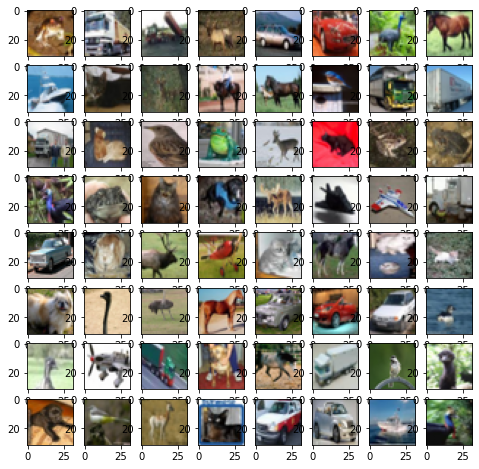

In [8]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    a = fig.add_subplot(8,8,i+1)
    a.imshow(images_train[i],cmap = plt.cm.bone)
plt.show()

In [9]:
images_train_transformed = images_train.reshape((50000,32*32*3))

In [10]:
images_test_transformed = images_test.reshape((10000,32*32*3))

In [11]:
sc = StandardScaler()

In [12]:
images_train_transformed_std = sc.fit_transform(images_train_transformed)

In [13]:
images_test_transformed_std = sc.fit_transform(images_test_transformed)

In [14]:
pca = PCA()

In [15]:
pca.fit(images_train_transformed_std)

PCA()

In [16]:
pca.explained_variance_

array([8.27004984e+02, 3.49308855e+02, 2.20112108e+02, ...,
       2.42349805e-05, 2.25321319e-05, 2.24272605e-05])

In [17]:
k = 0
current_variance = 0
total = (pca.explained_variance_).sum()

while(current_variance/total < 0.95):
    current_variance+=(pca.explained_variance_)[i]
    k+=1
k

676

In [18]:
pca1 = PCA(n_components = k)

In [19]:
images_train_transformed_std_pca = pca1.fit_transform(images_train_transformed_std)

In [20]:
images_test_transformed_std_pca = pca1.transform(images_test_transformed_std)

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.svm import SVC

In [23]:
svc = SVC()

In [24]:
grid = {"kernel":["rbf", "poly"], "C":[1e2, 5e2, 1e3, 8e3, 1e4], "gamma":[1e-3, 1e-4, 5e-2, 1e-5]}

In [25]:
cv = GridSearchCV(svc,grid)

In [26]:
svc = SVC(kernel = 'rbf', gamma = 0.001, C = 100)

In [27]:
start = time.time()
svc.fit(images_train_transformed_std_pca,class_train)
print(time.time() - start)

4455.152716398239


In [28]:
svc.score(images_test_transformed_std_pca,class_test)

0.5603

In [29]:
y_pred = svc.predict(images_test_transformed_std_pca)

In [30]:
y_pred

array([3, 8, 8, ..., 5, 3, 7])

In [31]:
count = 0;
for i in range(len(y_pred)):
    if(y_pred[i]!=class_test[i]):
        count+=1
count

4397

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
confusion_matrix(class_test,y_pred)

array([[605,  47,  50,  26,  20,  15,  21,  22, 109,  85],
       [ 25, 704,  10,  38,   7,  17,   7,  12,  40, 140],
       [ 71,  30, 432, 108,  97,  80,  78,  51,  20,  33],
       [ 22,  39,  76, 416,  46, 189,  82,  36,  19,  75],
       [ 45,  18, 143,  80, 486,  51,  75,  58,  21,  23],
       [ 23,  13,  65, 215,  54, 474,  48,  51,  17,  40],
       [ 12,  26,  80, 116,  79,  52, 579,  20,   9,  27],
       [ 28,  30,  39,  87,  49,  67,  12, 578,  13,  97],
       [ 84,  87,  12,  42,  17,  18,   9,  14, 652,  65],
       [ 29, 133,   4,  43,   9,  24,  10,  26,  45, 677]], dtype=int64)

In [36]:
print(classification_report(class_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1000
           1       0.62      0.70      0.66      1000
           2       0.47      0.43      0.45      1000
           3       0.36      0.42      0.38      1000
           4       0.56      0.49      0.52      1000
           5       0.48      0.47      0.48      1000
           6       0.63      0.58      0.60      1000
           7       0.67      0.58      0.62      1000
           8       0.69      0.65      0.67      1000
           9       0.54      0.68      0.60      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



In [56]:
y_pred_names = []
for i in range(len(y_pred)):
    y_pred_names.append(class_names[y_pred[i]])
y_pred_names

['cat',
 'ship',
 'ship',
 'airplane',
 'deer',
 'frog',
 'automobile',
 'deer',
 'bird',
 'automobile',
 'airplane',
 'automobile',
 'dog',
 'automobile',
 'truck',
 'ship',
 'dog',
 'cat',
 'ship',
 'frog',
 'truck',
 'airplane',
 'airplane',
 'truck',
 'deer',
 'frog',
 'dog',
 'airplane',
 'truck',
 'frog',
 'frog',
 'deer',
 'deer',
 'dog',
 'truck',
 'automobile',
 'frog',
 'truck',
 'truck',
 'ship',
 'deer',
 'frog',
 'cat',
 'deer',
 'truck',
 'truck',
 'dog',
 'ship',
 'deer',
 'bird',
 'truck',
 'ship',
 'frog',
 'cat',
 'ship',
 'ship',
 'dog',
 'automobile',
 'cat',
 'bird',
 'horse',
 'cat',
 'frog',
 'truck',
 'frog',
 'bird',
 'automobile',
 'bird',
 'cat',
 'truck',
 'bird',
 'frog',
 'ship',
 'ship',
 'truck',
 'bird',
 'truck',
 'cat',
 'frog',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'dog',
 'bird',
 'horse',
 'cat',
 'ship',
 'ship',
 'truck',
 'airplane',
 'deer',
 'ship',
 'frog',
 'deer',
 'cat',
 'deer',
 'airplane',
 'truck',
 'truck',
 'deer',
 'deer'

In [57]:
count1 = 0;
for i in range(len(y_pred_names)):
    if(y_pred_names[i]!=class_names[class_test[i]]):
        count1+=1
count1

4397

In [59]:
np.savetxt("cifar10_predictions.csv",y_pred_names,fmt="%s")